<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/BT_AI_W5_FUZZYLOGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4e7af1c63386da7fa8d4ba05a23dbecb87367bc34696b35326fecda80e90e6b0
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


0.23796562746903085


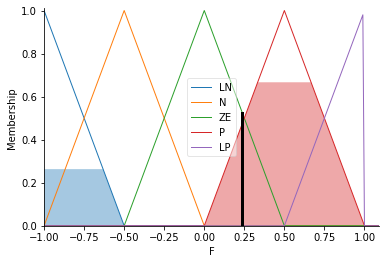

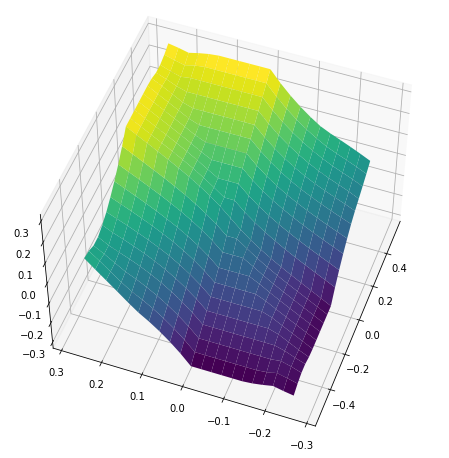

In [50]:
# CON LAC NGUOC

import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib.pyplot import contourf
from networkx.algorithms.bipartite import projection
from types import SimpleNamespace
from skfuzzy.control.controlsystem import ControlSystem
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

anpha = ctrl.Antecedent(np.arange(-1.5,1.6,0.01),'anpha') # goc lech
daoham_anpha = ctrl.Antecedent(np.arange(-0.78,0.8,0.01), 'daoham_anpha') # van toc goc lech
F = ctrl.C=ctrl.Consequent(np.arange(-1,1.1,0.01), 'F') # luc tac dong vao xe

anpha['LN'] = fuzz.trimf(anpha.universe, [-1.5,-1.5,-0.75]) # GOC LECH AM LON
anpha['N'] = fuzz.trimf(anpha.universe, [-1.5,-0.75,0]) # GOC LECH AM 
anpha['ZE'] = fuzz.trimf(anpha.universe, [-0.75,0,0.75]) #GOC LECH 0
anpha['P'] = fuzz.trimf(anpha.universe, [0,0.75,1.5]) #GOC LECH DUONG
anpha['LP'] = fuzz.trimf(anpha.universe, [0.75,1.5,1.5]) #GOC LECH DUONG LON
#anpha.view()

daoham_anpha['LN'] = fuzz.trimf(daoham_anpha.universe, [-0.78,-0.78,-0.4]) # VAN TOC GOC LECH AM LON
daoham_anpha['N'] = fuzz.trimf(daoham_anpha.universe, [-0.78,-0.4,0]) # VAN TOC GOC LECH AM 
daoham_anpha['ZE'] = fuzz.trimf(daoham_anpha.universe, [-0.4,0,0.4]) # VAN TOC GOC LECH 0
daoham_anpha['P'] = fuzz.trimf(daoham_anpha.universe, [0,0.4,0.78]) # VAN TOC GOC LECH DUONG
daoham_anpha['LP'] = fuzz.trimf(daoham_anpha.universe, [0.4,0.78,0.78]) # VAN TOC GOC LECH DUONG LON
#daoham_anpha.view()

F['LN'] = fuzz.trimf(F.universe, [-1,-1,-0.5]) # LUC TAC DONG AM LON
F['N'] = fuzz.trimf(F.universe, [-1,-0.5,0]) # LUC TAC DONG AM 
F['ZE'] = fuzz.trimf(F.universe, [-0.5,0,0.5]) #LUC TAC DONG 0
F['P'] = fuzz.trimf(F.universe, [0,0.5,1]) #LUC TAC DONG DUONG 
F['LP'] = fuzz.trimf(F.universe, [0.5,1,1]) #LUC TAC DONG DUONG LON
#F.view()

rule0 = ctrl.Rule(antecedent = ((anpha['LN']& daoham_anpha['LN'])|(anpha['N']&daoham_anpha['LN'])| (anpha['LN']&daoham_anpha['N'])),consequent = F['LN'], label = 'ruleLN')
rule1 = ctrl.Rule(antecedent = ((anpha['LP']& daoham_anpha['LP'])|(anpha['LP']&daoham_anpha['P'])| (anpha['P']&daoham_anpha['LP'])),consequent = F['LN'], label = 'ruleLP')
rule2 = ctrl.Rule(antecedent = ((anpha['ZE']& daoham_anpha['ZE'])|(anpha['LN']& daoham_anpha['LP'])|(anpha['LP']& daoham_anpha['LN'])|(anpha['P']& daoham_anpha['N'])),consequent = F['ZE'], label = 'ruleZE')
rule3 = ctrl.Rule(antecedent = ((anpha['LP']&daoham_anpha['N'])| (anpha['P']&daoham_anpha['ZE'])| (anpha['LP']&daoham_anpha['ZE'])| 
                                (anpha['P']&daoham_anpha['P'])| (anpha['ZE']&daoham_anpha['P'])| (anpha['ZE']&daoham_anpha['LP'])| (anpha['N']&daoham_anpha['P'])|
                                (anpha['N']&daoham_anpha['LP'])),consequent = F['P'], label = 'ruleP')
rule4 = ctrl.Rule(antecedent = ((anpha['N']& daoham_anpha['N'])|(anpha['N']&daoham_anpha['ZE'])| (anpha['LN']&daoham_anpha['ZE'])| (anpha['LN']&daoham_anpha['P'])|
                                (anpha['ZE']&daoham_anpha['LN'])| (anpha['ZE']&daoham_anpha['N'])| (anpha['P']&daoham_anpha['LN'])),consequent = F['N'], label = 'ruleN')
system_ctrl = ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['anpha']=0.5
system.input['daoham_anpha']=0.5
system.compute()
print(system.output['F'])
F.view(sim=system)
 
sim=ctrl.ControlSystemSimulation(system_ctrl, flush_after_run=21*21+1)
upsampled=np.linspace(-1/2,1/2,21)
upsampled1=np.linspace(-1/4,1/4,21)
x,y= np.meshgrid(upsampled,upsampled1)
z= np.zeros_like(x)
for i in range(21):
  for j in range(21):
    sim.input['anpha']=x[i,j]
    sim.input['daoham_anpha']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['F']
fig = plt.figure(figsize =(8,8))
ax=fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5) 
cset = ax.contourf(x, y, z, zdir='x', offset=10, cmap='viridis', alpha=0.5) 
cset = ax.contourf(x, y, z, zdir='y', offset=10, cmap='viridis', alpha=0.5) 
ax.view_init(50, 200)

0.4999013135960472


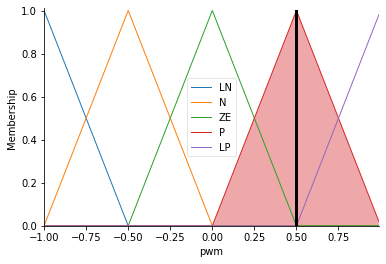

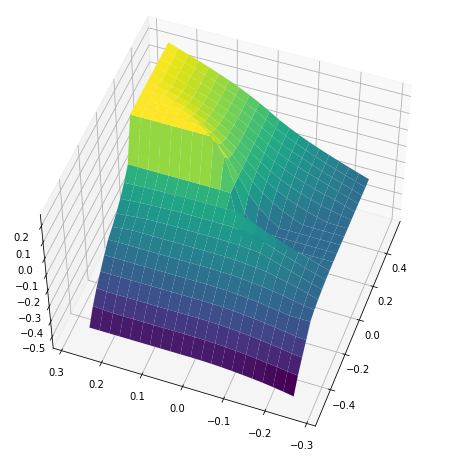

In [51]:
# DC SERVO

import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib.pyplot import contourf
from networkx.algorithms.bipartite import projection
from types import SimpleNamespace
from skfuzzy.control.controlsystem import ControlSystem
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

e = ctrl.Antecedent(np.arange(-1,1.1,0.01),'e') # sai so toc do
daoham_e = ctrl.Antecedent(np.arange(-1,1,0.01), 'daoham_e') # bien thien sai so toc do
pwm = ctrl.C=ctrl.Consequent(np.arange(-1,1,0.01), 'pwm') 

e['LN'] = fuzz.trimf(e.universe, [-1,-1,-0.5]) # SAI SO TOC DO AM LON
e['N'] = fuzz.trimf(e.universe, [-1.5,-0.75,0]) # SAI SO TOC DO AM 
e['ZE'] = fuzz.trimf(e.universe, [-0.5,0,0.]) #SAI SO TOC DO 0
e['P'] = fuzz.trimf(e.universe, [0,0.5,1]) #SAI SO TOC DO DUONG
e['LP'] = fuzz.trimf(e.universe, [0.5,1,1]) #SAI SO TOC DO DUONG LON
#e.view()

daoham_e['LN'] = fuzz.trimf(daoham_e.universe, [-1,-1,-0.5]) # BIEN THIEN SAI SO TOC DO AM LON
daoham_e['N'] = fuzz.trimf(daoham_e.universe, [-1,-0.5,0]) # BIEN THIEN SAI SO TOC DO AM 
daoham_e['ZE'] = fuzz.trimf(daoham_e.universe, [-0.5,0,0.5]) # BIEN THIEN SAI SO TOC DO 0
daoham_e['P'] = fuzz.trimf(daoham_e.universe, [0,0.5,1]) # BIEN THIEN SAI SO TOC DO DUONG
daoham_e['LP'] = fuzz.trimf(daoham_e.universe, [0.5,1,1]) # BIEN THIEN SAI SO TOC DO DUONG LON
#daoham_e.view()

pwm['LN'] = fuzz.trimf(pwm.universe, [-1,-1,-0.5]) # TOC DO DONG CO AM LON
pwm['N'] = fuzz.trimf(pwm.universe, [-1,-0.5,0]) # TOC DO DONG CO AM 
pwm['ZE'] = fuzz.trimf(pwm.universe, [-0.5,0,0.5]) #TOC DO DONG CO 0
pwm['P'] = fuzz.trimf(pwm.universe, [0,0.5,1]) #TOC DO DONG CO DUONG 
pwm['LP'] = fuzz.trimf(pwm.universe, [0.5,1,1]) #TOC DO DONG CODUONG LON
#pwm.view()

rule0 = ctrl.Rule(antecedent = ((e['LN']& daoham_e['LN'])|
                                (e['LN']&daoham_e['ZE'])| 
                                (e['LN']&daoham_e['N'])|
                                (e['N']&daoham_e['LN'])| 
                                (e['N']&daoham_e['N'])|
                                (e['ZE']&daoham_e['LN'])),consequent = pwm['LN'], label = 'ruleLN')
rule1 = ctrl.Rule(antecedent = ((e['LP']& daoham_e['LP'])|
                                (e['LP']&daoham_e['P'])| 
                                (e['P']&daoham_e['LP'])),consequent = pwm['LN'], label = 'ruleLP')
rule2 = ctrl.Rule(antecedent = ((e['ZE']& daoham_e['ZE'])|
                                (e['N']& daoham_e['LP'])|
                                (e['ZE']& daoham_e['P'])|
                                (e['P']& daoham_e['ZE'])|
                                (e['LP']& daoham_e['LN'])|
                                (e['LP']& daoham_e['N'])),consequent = pwm['ZE'], label = 'ruleZE')
rule3 = ctrl.Rule(antecedent = ((e['LP']&daoham_e['ZE'])| 
                                (e['P']&daoham_e['P'])| 
                                (e['ZE']&daoham_e['LP'])),consequent = pwm['P'], label = 'ruleP')
rule4 = ctrl.Rule(antecedent = ((e['LN']& daoham_e['P'])|
                                (e['LN']&daoham_e['LP'])| 
                                (e['N']&daoham_e['ZE'])|
                                (e['N']&daoham_e['P'])|
                                (e['ZE']&daoham_e['N'])| 
                                (e['P']&daoham_e['LN'])| 
                                (e['P']&daoham_e['N'])),consequent = pwm['N'], label = 'ruleN')
system_ctrl = ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['e']=0.5
system.input['daoham_e']=0.5
system.compute()
print(system.output['pwm'])
pwm.view(sim=system)
 
sim=ctrl.ControlSystemSimulation(system_ctrl, flush_after_run=21*21+1)
upsampled=np.linspace(-1/2,1/2,21)
upsampled1=np.linspace(-1/4,1/4,21)
x,y= np.meshgrid(upsampled,upsampled1)
z= np.zeros_like(x)
for i in range(21):
  for j in range(21):
    sim.input['e']=x[i,j]
    sim.input['daoham_e']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['pwm']
fig = plt.figure(figsize =(8,8))
ax=fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset=9, cmap='viridis', alpha=0.5) 
cset = ax.contourf(x, y, z, zdir='x', offset=10, cmap='viridis', alpha=0.5) 
cset = ax.contourf(x, y, z, zdir='y', offset=10, cmap='viridis', alpha=0.5) 
ax.view_init(50, 200)

118.04761904761888


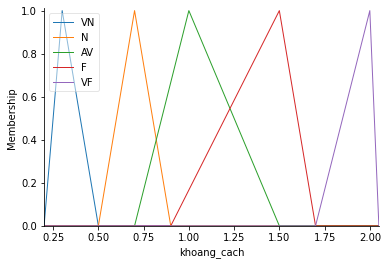

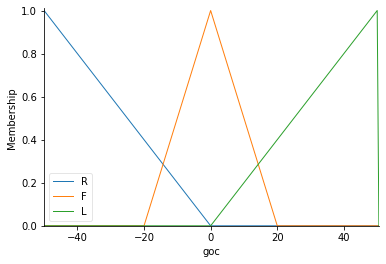

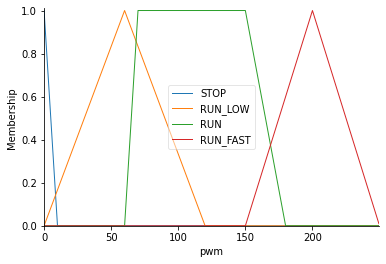

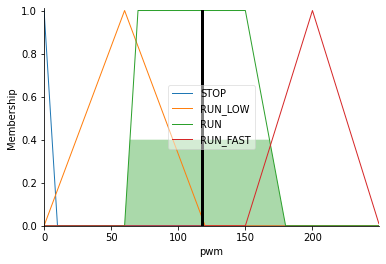

In [95]:
# MOBILE ROBOT

import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib.pyplot import contourf
from networkx.algorithms.bipartite import projection
from types import SimpleNamespace
from skfuzzy.control.controlsystem import ControlSystem
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

khoang_cach = ctrl.Antecedent(np.arange(0.2,2.1,0.05),'khoang_cach') 
goc = ctrl.Antecedent(np.arange(-50,51,0.5), 'goc') 
pwm = ctrl.C=ctrl.Consequent(np.arange(0,250,0.5), 'pwm') #toc do quay

khoang_cach['VN'] = fuzz.trimf(khoang_cach.universe, [0.2,0.3,0.5]) # khoang cach rat gan
khoang_cach['N'] = fuzz.trimf(khoang_cach.universe, [0.5,0.7,0.9]) # khoang cach gan
khoang_cach['AV'] = fuzz.trimf(khoang_cach.universe, [0.7,1,1.5]) # khoang cach tb
khoang_cach['F'] = fuzz.trimf(khoang_cach.universe, [0.9,1.5,1.7]) # khoang cach xa
khoang_cach['VF'] = fuzz.trimf(khoang_cach.universe, [1.7,2,2]) # khoang cach rat xa
khoang_cach.view()

goc['R'] = fuzz.trimf(goc.universe, [-50,-50,0]) # goc ben phai
goc['F'] = fuzz.trimf(goc.universe, [-20,0,20]) # goc o truoc
goc['L'] = fuzz.trimf(goc.universe, [0,50,50]) # goc ben trai
goc.view()

pwm['STOP'] = fuzz.trimf(pwm.universe, [0,0,10]) 
pwm['RUN_LOW'] = fuzz.trimf(pwm.universe, [0,60,120])
pwm['RUN'] = fuzz.trapmf(pwm.universe, [60,70,150,180])
pwm['RUN_FAST'] = fuzz.trimf(pwm.universe, [150,200,250])
pwm.view()

rule0 = ctrl.Rule(antecedent = ((khoang_cach['VN']& goc['R'])|
                                (khoang_cach['VN']&goc['F'])| 
                                (khoang_cach['VN']&goc['L'])|
                                (khoang_cach['N']&goc['F'])),consequent = pwm['STOP'], label = 'ruleSTOP')
rule1 = ctrl.Rule(antecedent = ((khoang_cach['N']& goc['R'])|
                                (khoang_cach['N']&goc['L'])| 
                                (khoang_cach['AV']&goc['F'])),consequent = pwm['RUN_LOW'], label = 'ruleRUN_LOW')
rule2 = ctrl.Rule(antecedent = ((khoang_cach['AV']& goc['R'])|
                                (khoang_cach['AV']& goc['L'])|
                                (khoang_cach['F']& goc['F'])|
                                (khoang_cach['F']& goc['R'])|
                                (khoang_cach['F']& goc['L'])),consequent = pwm['RUN'], label = 'ruleRUN')
rule3 = ctrl.Rule(antecedent = ((khoang_cach['VF']&goc['R'])| 
                                (khoang_cach['VF']&goc['F'])| 
                                (khoang_cach['VF']&goc['L'])),consequent = pwm['RUN_FAST'], label = 'ruleRUN_FAST')
system_ctrl = ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['khoang_cach']=1
system.input['goc']=20
system.compute()
print(system.output['pwm'])
pwm.view(sim=system)
